<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [73]:
import geopandas as gpd

linkGit='https://github.com/20232059/EVALUACION1/raw/refs/heads/main/'
linkWorldMaps='NIVEL_1_DEPARTAMENTOS.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [74]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,NIVEL __ 111,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [75]:
NIVEL__111=gpd.read_file(linkGit+linkWorldMaps,layer='NIVEL __ 111')

# see some
NIVEL__111

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PER.1_1,PER,Peru,Amazonas,NA,NA,Región,Region,01,PE.AM,PE-AMA,"MULTIPOLYGON (((-77.78027 -6.94195, -77.78199 ..."
1,PER.2_1,PER,Peru,Ancash,Ancachs,NA,Región,Region,02,PE.AN,PE-ANC,"MULTIPOLYGON (((-77.28622 -10.55822, -77.28796..."
2,PER.3_1,PER,Peru,Apurímac,Apuromac,NA,Región,Region,03,PE.AP,NA,"MULTIPOLYGON (((-73.2403 -13.47629, -73.23711 ..."
3,PER.4_1,PER,Peru,Arequipa,NA,NA,Región,Region,04,PE.AR,PE-ARE,"MULTIPOLYGON (((-71.84236 -17.17264, -71.84236..."
4,PER.5_1,PER,Peru,Ayacucho,NA,NA,Región,Region,05,PE.AY,PE-AYA,"MULTIPOLYGON (((-73.29331 -15.39209, -73.29623..."
5,PER.6_1,PER,Peru,Cajamarca,Caxamarca,NA,Región,Region,06,PE.CJ,PE-CAJ,"MULTIPOLYGON (((-77.82693 -7.35244, -77.82586 ..."
6,PER.7_1,PER,Peru,Callao,El Callao,NA,Provincia,Province,07,PE.CL,NA,"MULTIPOLYGON (((-77.23263 -12.12958, -77.23263..."
7,PER.8_1,PER,Peru,Cusco,Cuzco|Qosqo,NA,Región,Region,08,PE.CS,PE-CUS,"MULTIPOLYGON (((-71.05321 -15.42635, -71.05747..."
8,PER.9_1,PER,Peru,Huancavelica,NA,NA,Región,Region,09,PE.HV,PE-HUV,"MULTIPOLYGON (((-74.77753 -14.03637, -74.77662..."
9,PER.10_1,PER,Peru,Huánuco,Huknuco,NA,Región,Region,10,PE.HC,NA,"MULTIPOLYGON (((-76.47957 -10.32944, -76.47775..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [76]:
import pandas as pd
import csv
someDataLink='DatosFallecidos.csv'

# Try reading with 'latin1' encoding
someData=pd.read_csv(linkGit+someDataLink, encoding='latin1')

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DEPARTAMENTOS;N¼ DE FALLECIDOS  26 non-null     object
dtypes: object(1)
memory usage: 340.0+ bytes


In [77]:
##CODIGO PARA SEPARAR LA COLUMNA EN DOS: DEPARTAMENTOS Y N_FALLECIDOS
##PUESTO QUE EL ARCHIVO CSV AL SER SUBIDO A LA NUBE FUE RECONOCIDO COMO SI TUVIERA UNA SOLA COLUMNA
someData = pd.read_csv("https://github.com/20232059/EVALUACION1/raw/refs/heads/main/DatosFallecidos.csv", sep=";", encoding='latin1')

## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [78]:
someData.head()

,DEPARTAMENTOS,N¼ DE FALLECIDOS
0,AMAZONAS,1410
1,ANCASH,7414
2,APURIMAC,1701
3,AREQUIPA,10695
4,AYACUCHO,2431


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [79]:
##ESTA ES LA DATA OBTENIDA DEL MAPA Y MERGEADA CON LA DATA DEL CSV
NIVEL__111.NAME_1.head()

,NAME_1
0,Amazonas
1,Ancash
2,Apurímac
3,Arequipa
4,Ayacucho


In [80]:
##ESTA ES LA DATA QUE SE OBTUVO DEL CSV
someData.DEPARTAMENTOS.head()

,DEPARTAMENTOS
0,AMAZONAS
1,ANCASH
2,APURIMAC
3,AREQUIPA
4,AYACUCHO


Let's solve the _country name_ differences for the KEYs:

In [81]:
NIVEL__111.rename(columns={'NAME_1':'DEPARTAMENTOS'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [82]:
NIVEL__111['DEPARTAMENTOS']=NIVEL__111.DEPARTAMENTOS.str.upper()

It is very unlikely the names are written the same. Let's verify:

In [83]:
##SE HACE UNA DIFERENCIA ENTRE LOS DEPARTAMENTOS QUE ESTÁN EN EL MAPA Y LOS QUE NO
onlyDF=set(someData.DEPARTAMENTOS)- set(NIVEL__111.DEPARTAMENTOS)
onlyGDF=set(NIVEL__111.DEPARTAMENTOS)- set(someData.DEPARTAMENTOS)

Check here:

In [84]:
onlyDF # they did not find a match in the MAP GDF!

{'APURIMAC', 'HUANUCO', 'JUNIN', 'SAN MARTIN'}

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [85]:
 !pip install thefuzz

This is the basic idea:

In [86]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

#ESTE DATA SE BUSCA EN EL MAPA Y ENCUENTRA LO MÁS PARECIDO JUNTO A SU ÍNDICE
best('APURIMAC',onlyGDF)

('APURÍMAC', 93)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [87]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(DEPARTAMENTOS, best(DEPARTAMENTOS,onlyGDF)) for DEPARTAMENTOS in onlyDF]

[('JUNIN', ('JUNÍN', 89)),
 ('APURIMAC', ('APURÍMAC', 93)),
 ('HUANUCO', ('HUÁNUCO', 92)),
 ('SAN MARTIN', ('SAN MARTÍN', 95))]

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [88]:
#or
[(DEPARTAMENTOS, best(DEPARTAMENTOS,onlyGDF)[0],best(DEPARTAMENTOS,onlyGDF)[1]) for DEPARTAMENTOS in onlyDF]

[('JUNIN', 'JUNÍN', 89),
 ('APURIMAC', 'APURÍMAC', 93),
 ('HUANUCO', 'HUÁNUCO', 92),
 ('SAN MARTIN', 'SAN MARTÍN', 95)]

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [89]:
pd.DataFrame([(DEPARTAMENTOS, best(DEPARTAMENTOS,onlyGDF)[0],best(DEPARTAMENTOS,onlyGDF)[1]) for DEPARTAMENTOS in onlyDF])

,0,1,2
0,JUNIN,JUNÍN,89
1,APURIMAC,APURÍMAC,93
2,HUANUCO,HUÁNUCO,92
3,SAN MARTIN,SAN MARTÍN,95


Let's sort by the column '2' (the third):

The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [90]:
##MODIFICA LOS ÍNDICES DE MENOR A MAYOR
pd.DataFrame([(DEPARTAMENTOS, best(DEPARTAMENTOS,onlyGDF)[0],best(DEPARTAMENTOS,onlyGDF)[1]) for DEPARTAMENTOS in onlyDF]).sort_values(by=2)

,0,1,2
0,JUNIN,JUNÍN,89
2,HUANUCO,HUÁNUCO,92
1,APURIMAC,APURÍMAC,93
3,SAN MARTIN,SAN MARTÍN,95


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [91]:
NIVEL__111.DEPARTAMENTOS[NIVEL__111.DEPARTAMENTOS.str.contains('LIMA|JUNÍN|HUÁNUCO|APURÍMAC|SAN MARTÍN')]

,DEPARTAMENTOS
2,APURÍMAC
9,HUÁNUCO
11,JUNÍN
14,LIMA
15,LIMA PROVINCE
22,SAN MARTÍN


In [92]:
# this is a {dictionary}

manualChanges={'LIMA':'LIMA',
               'JUNIN':'JUNÍN',
               'HUANUCO':'HUÁNUCO',
               'APURIMAC':'APURÍMAC',
               'SAN MARTIN':'SAN MARTÍN',
              }

NIVEL__111.replace(to_replace={'DEPARTAMENTOS':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [93]:
# updating
onlyDF=set(someData.DEPARTAMENTOS)- set(NIVEL__111.DEPARTAMENTOS)
onlyGDF=set(NIVEL__111.DEPARTAMENTOS)- set(someData.DEPARTAMENTOS)

An re run this code:

In [94]:
# keeping high scores
pd.DataFrame([(DEPARTAMENTOS, best(DEPARTAMENTOS, onlyGDF)[0], best(DEPARTAMENTOS, onlyGDF)[1]) for DEPARTAMENTOS in onlyDF]).sort_values(2)

,0,1,2
0,JUNIN,JUNÍN,89
2,HUANUCO,HUÁNUCO,92
1,APURIMAC,APURÍMAC,93
3,SAN MARTIN,SAN MARTÍN,95


All this is correct now!

Let's prepare the changes:

In [95]:
##PREPARA LOS CAMBIOS
# new {dictionary}
changesToDF={DEPARTAMENTOS: best(DEPARTAMENTOS,onlyGDF)[0] for DEPARTAMENTOS in onlyDF}
changesToDF

{'JUNIN': 'JUNÍN',
 'APURIMAC': 'APURÍMAC',
 'HUANUCO': 'HUÁNUCO',
 'SAN MARTIN': 'SAN MARTÍN'}

In [96]:
##REEMPLAZA LOS DATOS
someData.replace(to_replace={'DEPARTAMENTOS':changesToDF},inplace=True)

What is left to match?

In [97]:
# updating
onlyDF=set(someData.DEPARTAMENTOS)- set(NIVEL__111.DEPARTAMENTOS)
onlyGDF=set(NIVEL__111.DEPARTAMENTOS)- set(someData.DEPARTAMENTOS)
[(DEPARTAMENTOS, best(DEPARTAMENTOS,onlyGDF)) for DEPARTAMENTOS in onlyDF]

[]

Once you are here, merging can proceed:

In [98]:
## GDF to the 'left'
theMapAndData=NIVEL__111.merge(someData, on='DEPARTAMENTOS')

And our GDF has social data now!

In [99]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GID_1             26 non-null     object  
 1   GID_0             26 non-null     object  
 2   COUNTRY           26 non-null     object  
 3   DEPARTAMENTOS     26 non-null     object  
 4   VARNAME_1         26 non-null     object  
 5   NL_NAME_1         26 non-null     object  
 6   TYPE_1            26 non-null     object  
 7   ENGTYPE_1         26 non-null     object  
 8   CC_1              26 non-null     object  
 9   HASC_1            26 non-null     object  
 10  ISO_1             26 non-null     object  
 11  geometry          26 non-null     geometry
 12  N¼ DE FALLECIDOS  26 non-null     int64   
dtypes: geometry(1), int64(1), object(11)
memory usage: 2.8+ KB


We should save this map of countries and their indicators in a new file:

In [100]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [101]:
##SE MODIFICÓ : SE USÓ CON EL FIN DE QUE NO CUENTE LA CANTIDAD DE COLUMNAS DE CIERTA CATEGORÍA PORQUE SOLO SON DOS COLUMNAS,
##EN EL CASO DE N_FALLECIDOS, APARECÍA SOLO LA CANTIDAD (EN NÚMEROS) DE FALLECIDOS Y AL LADO EL NÚMERO 1;
##EN EL CASO DE DEPARTAMENTOS, APARECÍA EL NOMBRE DEL DEPARTAMENTO Y AL COSTADO UN 1
##theMapAndData.DEPARTAMENTOS.value_counts()
theMapAndData.groupby("DEPARTAMENTOS")["N¼ DE FALLECIDOS"].sum()

,N¼ DE FALLECIDOS
DEPARTAMENTOS,
AMAZONAS,1410
ANCASH,7414
APURÍMAC,1701
AREQUIPA,10695
AYACUCHO,2431
CAJAMARCA,4632
CALLAO,10968
CUSCO,5322
HUANCAVELICA,1302


### Preprocessing: Filtering

<Axes: >

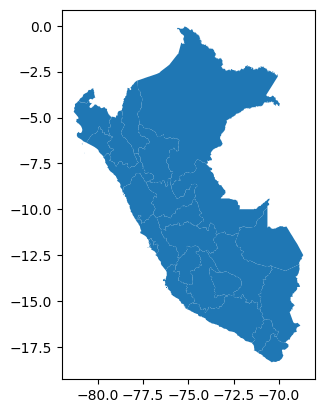

In [102]:
# then

PERU=theMapAndData
PERU.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [103]:
##SE CREA JUSTDOTS PARA NO MODIFICAR PERU Y SE DIVIDE EL N_FALLECIDOS ENTRE 50 (CADA PUNTO VALE 50 PERSONAS)
justDots=PERU.copy()
##SE UTILIZA CINCUENTA Y NO DIEZ MIL COMO EN EL EJEMPLO DE LA CLASE, PORQUE SEGÚN LA DATA PERU NO LLEGÓ A ESA CANTIDAD
##¿CUÁNTOS PUNTOS VOY A TENER?
dot_value = 50
justDots['num_dots'] = (justDots['N¼ DE FALLECIDOS'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [104]:
##SE CREA LA GEOGRAFÍA DE PUNTOS
##SE GENERA ESA CANTIDAD DE PUNTOS
# 2. Generate the random dot locations using .sample_points()
justDots =justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [105]:
##UBICACIONES DE LOS PUNTOS
justDots

0   0       POINT (-78.6041 -4.79858)
    1      POINT (-78.60095 -4.58422)
    2      POINT (-78.58685 -5.25867)
    3      POINT (-78.52407 -5.09747)
    4      POINT (-78.50884 -4.65108)
                     ...             
25  61    POINT (-71.58476 -10.13445)
    62    POINT (-71.21407 -10.12688)
    63     POINT (-71.03487 -9.91793)
    64    POINT (-71.00431 -10.27165)
    65     POINT (-70.68951 -9.70649)
Name: sampled_points, Length: 4406, dtype: geometry

In [106]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [107]:
##SE CREA EL DataFrame DE PERU
justDots.reset_index(drop=True, inplace=True)
PERU_dots=gpd.GeoDataFrame(geometry=justDots)
PERU_dots

,geometry
0,POINT (-78.6041 -4.79858)
1,POINT (-78.60095 -4.58422)
2,POINT (-78.58685 -5.25867)
3,POINT (-78.52407 -5.09747)
4,POINT (-78.50884 -4.65108)
...,...
4401,POINT (-71.58476 -10.13445)
4402,POINT (-71.21407 -10.12688)
4403,POINT (-71.03487 -9.91793)
4404,POINT (-71.00431 -10.27165)


Now you have a GDF:

In [108]:
PERU_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  4406 non-null   geometry
dtypes: geometry(1)
memory usage: 34.6 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

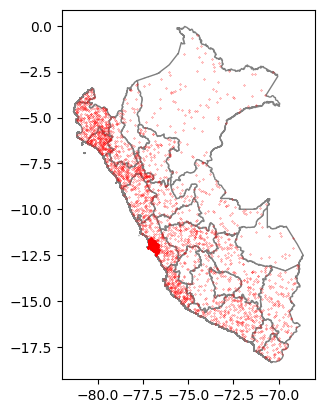

In [109]:
#SIN PROYECTAR
base=PERU.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
PERU_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

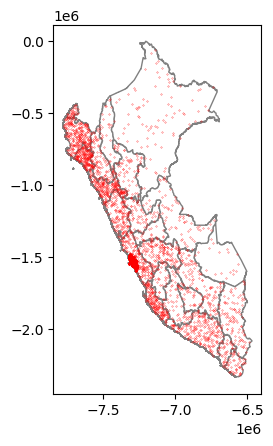

In [110]:
##PROYECCIÓN RECOMENDADA
base=PERU.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
PERU_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [111]:
PERU_8857=PERU.to_crs(8857)
PERU_dots_8857=PERU_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [112]:
##proyección de centroides
PERU_8857_centroids = PERU_8857.copy()

# PERU_8857_centroids will have a new geometry:
PERU_8857_centroids['geometry'] = PERU_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [113]:
##TAMAÑO DEL CENTROIDE SEGÚN LA POBLACIÓN
PERU_8857_centroids['size'] = PERU_8857_centroids['N¼ DE FALLECIDOS'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# PERU_8857_centroids['size'] = PERU_8857_centroids['N¼ DE FALLECIDOS'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

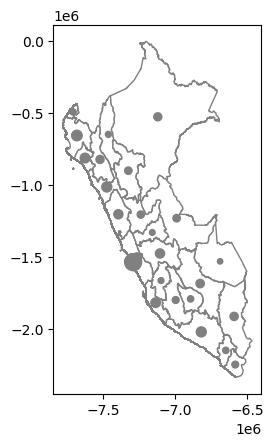

In [114]:
base=PERU_8857.plot(facecolor="white",
                      edgecolor='grey')
## EN ESTE CASO SE MULTIPLICA POR 50, PORQUE EL CÍRCULO ES DEMASIADO PEQUEÑO Y ESE VALOR SERÍA UNA FORMA DE MOSTRARLO PROPORCIONALMENTE,
##SIN ALTERAR EL RESTO DE TERRITORIOS
# Plot the centroids on top
PERU_8857_centroids.plot(
    ax=base,
    markersize=PERU_8857_centroids['size']*50,
    color='grey'
)

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [115]:
##NO SE INSTALÓ "mapclassify", PORQUE NO FUE NECESARIO UBICAR EL PUNTO REPRESENTATIVO DE LOS DEPARTAMENTOS, YA QUE SIEMPRE ESTARÁ EN EL CENTROIDE, NO SE SALDRÁ DEL TERRITORIO

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

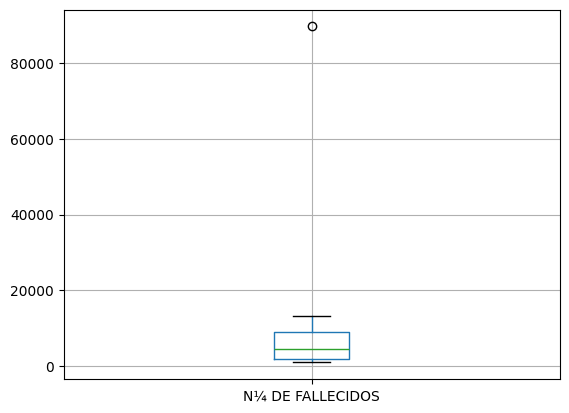

In [116]:
boxplotInfo=PERU_8857_centroids.boxplot(column='N¼ DE FALLECIDOS',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [117]:
##VALORES ATÍPICOS
## VALORES DE LOS DEPARTAMENTOS QUE TIENE UN GRAN CANTIDAD DE FALLECIDOS
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([89709], dtype=object)

Then, these are the outlying countries:

In [118]:
##INFORMACIÓN DEL DEPARTAMENTO CON MÁS FALLECIDOS
PERU_8857_centroids[PERU_8857_centroids['N¼ DE FALLECIDOS'].isin(outliers)]

,GID_1,GID_0,COUNTRY,DEPARTAMENTOS,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,N¼ DE FALLECIDOS,size
15,PER.15_1,PER,Peru,LIMA PROVINCE,NA,NA,Provincia,Province,15,PE.LP,NA,POINT (-7290855.49 -1538460.743),89709,2.995146


Knowing this information, we can create a column as outlier flag:

In [119]:
##VALOR 1: ATÍPICO
##VALOR 0: NO ATÍPICO
PERU_8857_centroids['N_FALLECIDOS_outlier']=PERU_8857_centroids['N¼ DE FALLECIDOS'].isin(outliers)*1
## see
PERU_8857_centroids

,GID_1,GID_0,COUNTRY,DEPARTAMENTOS,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,N¼ DE FALLECIDOS,size,N_FALLECIDOS_outlier
0,PER.1_1,PER,Peru,AMAZONAS,NA,NA,Región,Region,01,PE.AM,PE-AMA,POINT (-7462866.41 -651291.474),1410,0.375500,0
1,PER.2_1,PER,Peru,ANCASH,Ancachs,NA,Región,Region,02,PE.AN,PE-ANC,POINT (-7393341.955 -1205803.158),7414,0.861046,0
2,PER.3_1,PER,Peru,APURÍMAC,Apuromac,NA,Región,Region,03,PE.AP,NA,POINT (-6892026.19 -1793248.554),1701,0.412432,0
3,PER.4_1,PER,Peru,AREQUIPA,NA,NA,Región,Region,04,PE.AR,PE-ARE,POINT (-6817823.133 -2022405.665),10695,1.034166,0
4,PER.5_1,PER,Peru,AYACUCHO,NA,NA,Región,Region,05,PE.AY,PE-AYA,POINT (-6995523.103 -1800953.397),2431,0.493052,0
5,PER.6_1,PER,Peru,CAJAMARCA,Caxamarca,NA,Región,Region,06,PE.CJ,PE-CAJ,POINT (-7521045.026 -825139.701),4632,0.680588,0
6,PER.7_1,PER,Peru,CALLAO,El Callao,NA,Provincia,Province,07,PE.CL,NA,POINT (-7313592.984 -1530420.952),10968,1.047282,0
7,PER.8_1,PER,Peru,CUSCO,Cuzco|Qosqo,NA,Región,Region,08,PE.CS,PE-CUS,POINT (-6825631.69 -1686777.259),5322,0.729520,0
8,PER.9_1,PER,Peru,HUANCAVELICA,NA,NA,Región,Region,09,PE.HV,PE-HUV,POINT (-7097385.073 -1665997.98),1302,0.360832,0
9,PER.10_1,PER,Peru,HUÁNUCO,Huknuco,NA,Región,Region,10,PE.HC,NA,POINT (-7237974.943 -1207720.319),2970,0.544977,0


We can use that like this:

<Axes: >

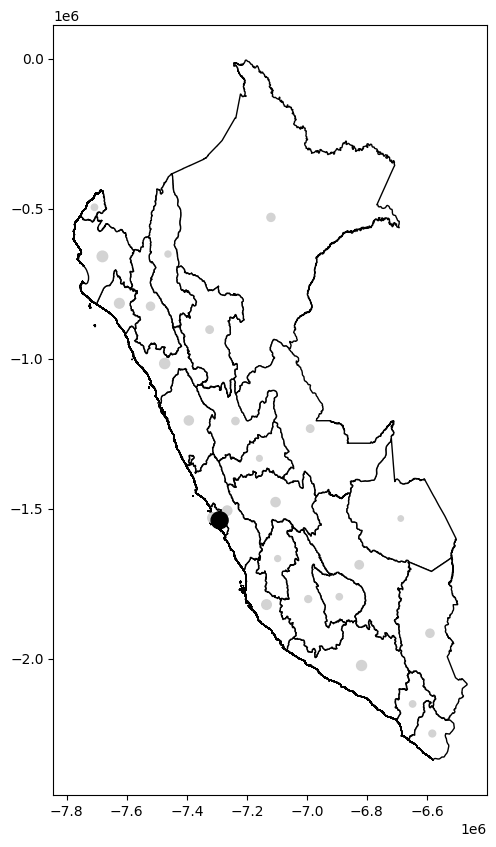

In [120]:
base = PERU_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
PERU_8857_centroids.plot(
    ax=base,
    markersize=PERU_8857_centroids['size']*50,
    color=PERU_8857_centroids['N_FALLECIDOS_outlier'].map(mapcolor)
)

##EL CÍRCULO DE COLOR NEGRO REPRESENTA EL DEPARTAMENTO CON MAYOR TASA DE FALLECIMIENTOS POR EL COVID-19

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [121]:
##MAPA DE CENTROIDES
# Create explicit copies of the DataFrames
PERU_8857_centroids_out = PERU_8857_centroids[PERU_8857_centroids.N_FALLECIDOS_outlier==1].copy()
PERU_8857_centroids_no_out = PERU_8857_centroids[PERU_8857_centroids.N_FALLECIDOS_outlier==0].copy()


2. Compute sizes in each:

In [122]:
##CALCULO DEL TAMAÑO
PERU_8857_centroids_out['size'] = PERU_8857_centroids_out['N¼ DE FALLECIDOS'].apply(lambda x: x**0.5 / 50)
PERU_8857_centroids_no_out['size'] = PERU_8857_centroids_no_out['N¼ DE FALLECIDOS'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

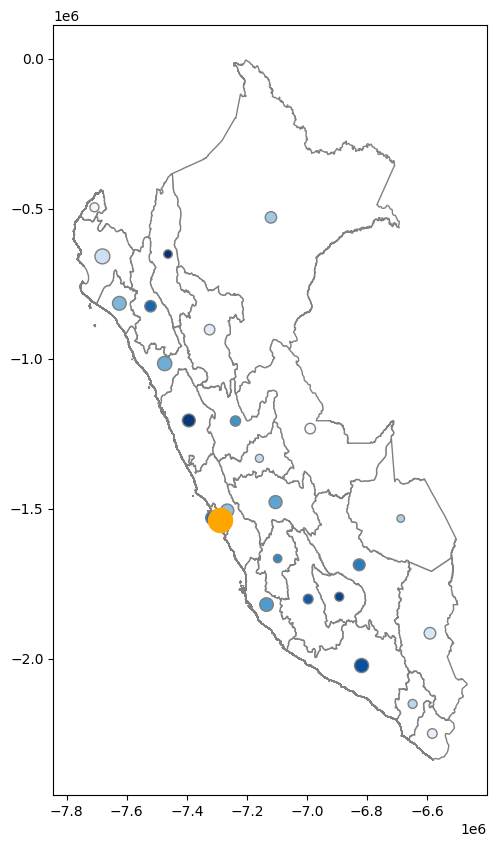

In [123]:
base=PERU_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

PERU_8857_centroids_no_out.plot(
    ax=base,
    markersize=PERU_8857_centroids_no_out['size']*50,
    edgecolor='grey',
    c=PERU_8857_centroids_no_out['size']*50,
    cmap='Blues_r'
)
PERU_8857_centroids_out.plot(
    ax=base,
    markersize=PERU_8857_centroids_out['size']*50,
    color='orange'
)

##ATÍPICOS: DE UN SOLO COLOR
##TÍPICOS: CON COLORES DEGRADADOS

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

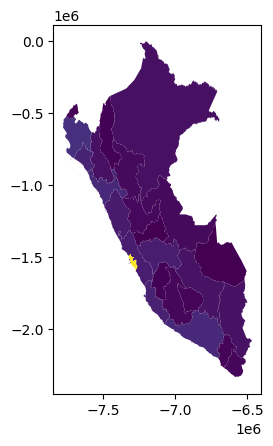

In [124]:
##NO ES CLOROPLETH
PERU_8857.plot(PERU_8857['N¼ DE FALLECIDOS'])

* This **IS** a choropleth:

<Axes: >

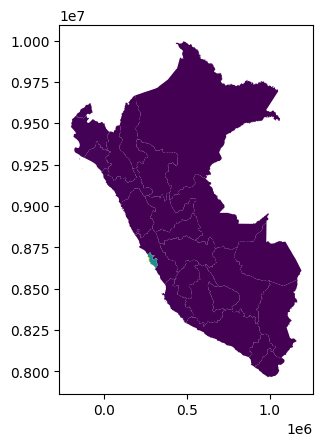

In [125]:
##SÍ ES CLOROPLETH PORQUE DE LA CANTIDAD TOTAL DE FALLECIDOS POR COVID-19 SE DIVIDE ENTRE KM^2

##SE VA CREANDO LA VARIABLE
##PERU = gpd.read_file("https://github.com/20232059/EVALUACION1/raw/refs/heads/main/NIVEL_1_DEPARTAMENTOS.gpkg")
##PARA CALCULAR EL ÁREA SE UTILIZA EL UTM ZONA 18S CORRESPONDIENTE A PERÚ EPSG="32718"
#PERU = PERU.to_crs(epsg=32718)
##CALCULANDO EL ÁREA EN KM^2
##PERU = PERU.geometry.area / 1e6
##PERU['densidad'] = NIVEL__111['N_FALLECIDOS'] / PERU['']

PERU_8857 = PERU_8857.to_crs(epsg=32718)
PERU_8857['sq_km'] = PERU_8857.geometry.area / 1e6
PERU_8857['N_FALLECIDOS_density'] = PERU_8857['N¼ DE FALLECIDOS'] / PERU_8857['sq_km'] # Calculate density
PERU_8857.plot(column='N_FALLECIDOS_density') # Plot the density

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [126]:
## do you have these installed?
#! pip show numba mapclassify numpy
!pip install mapclassify

We will discretize this:

In [127]:
PERU_8857['population_density']=PERU_8857['N¼ DE FALLECIDOS']/PERU_8857.sq_km

Let's explore the bining algorithms:

In [128]:
##DISCRETIZACIÓN - CREAR GRUPOS
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=PERU_8857['population_density']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [129]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

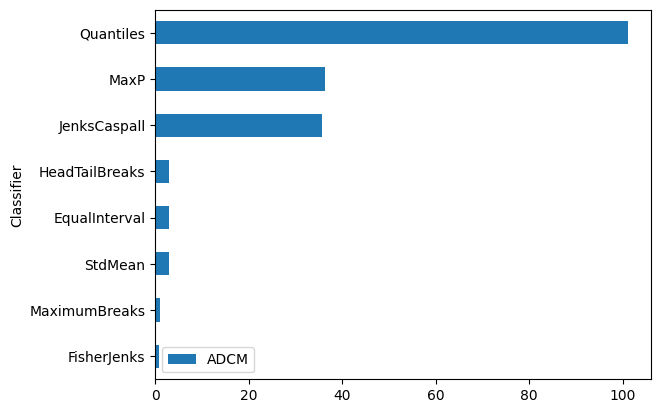

In [130]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [131]:
PERU_8857['population_density_FJ5'] = fj5.yb

In [132]:
# there you are
PERU_8857[['population_density','population_density_FJ5']].head(20)

,population_density,population_density_FJ5
0,0.035548,0
1,0.206272,1
2,0.080574,0
3,0.168806,1
4,0.055841,0
5,0.140294,1
6,68.156179,4
7,0.073540,0
8,0.059006,0
9,0.080120,0


We could create a copy of the bins to add labels:

In [133]:
# renaming - RENOMBRAR
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

PERU_8857['population_density_FJ5_cat']=PERU_8857.loc[:,'population_density_FJ5'].replace(newLabelsForLevels)

# we have
PERU_8857[['population_density','population_density_FJ5','population_density_FJ5_cat']].head(20)

,population_density,population_density_FJ5,population_density_FJ5_cat
0,0.035548,0,0_VeryLow
1,0.206272,1,1_Low
2,0.080574,0,0_VeryLow
3,0.168806,1,1_Low
4,0.055841,0,0_VeryLow
5,0.140294,1,1_Low
6,68.156179,4,4_VeryHigh
7,0.073540,0,0_VeryLow
8,0.059006,0,0_VeryLow
9,0.080120,0,0_VeryLow


We are ready for a discrete choropleth:

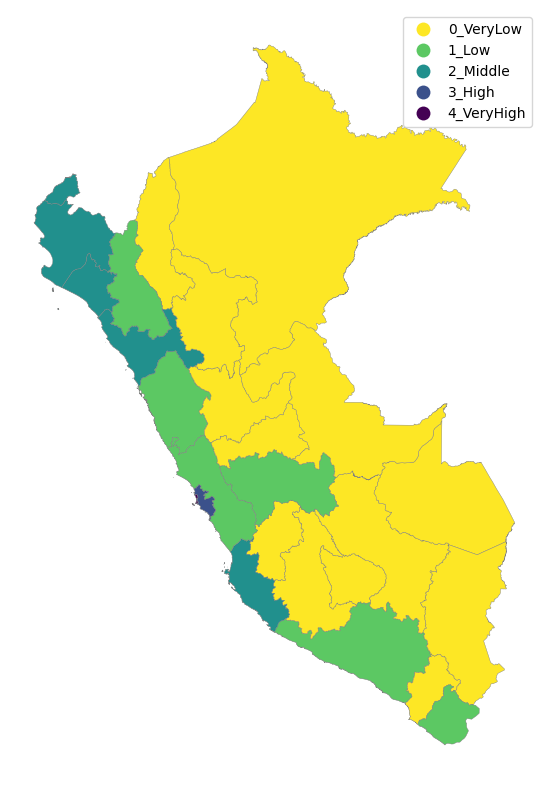

In [134]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
PERU_8857.plot(column='population_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [135]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
NIVEL__111
_3
theMapAndData
PERU
PERU_dots
_35
PERU_8857
PERU_dots_8857
PERU_8857_centroids
_46
_47
PERU_8857_centroids_out
PERU_8857_centroids_no_out
_75
_107
_118
_119


These are the ones needed in R:

In [136]:
# for choropleth and base map
PERU_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   GID_1                       26 non-null     object  
 1   GID_0                       26 non-null     object  
 2   COUNTRY                     26 non-null     object  
 3   DEPARTAMENTOS               26 non-null     object  
 4   VARNAME_1                   26 non-null     object  
 5   NL_NAME_1                   26 non-null     object  
 6   TYPE_1                      26 non-null     object  
 7   ENGTYPE_1                   26 non-null     object  
 8   CC_1                        26 non-null     object  
 9   HASC_1                      26 non-null     object  
 10  ISO_1                       26 non-null     object  
 11  geometry                    26 non-null     geometry
 12  N¼ DE FALLECIDOS            26 non-null     int64   
 13  sq_km         

In [137]:
# for DDMs
PERU_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  4406 non-null   geometry
dtypes: geometry(1)
memory usage: 34.6 KB


In [138]:
# for PSMs
PERU_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GID_1                 26 non-null     object  
 1   GID_0                 26 non-null     object  
 2   COUNTRY               26 non-null     object  
 3   DEPARTAMENTOS         26 non-null     object  
 4   VARNAME_1             26 non-null     object  
 5   NL_NAME_1             26 non-null     object  
 6   TYPE_1                26 non-null     object  
 7   ENGTYPE_1             26 non-null     object  
 8   CC_1                  26 non-null     object  
 9   HASC_1                26 non-null     object  
 10  ISO_1                 26 non-null     object  
 11  geometry              26 non-null     geometry
 12  N¼ DE FALLECIDOS      26 non-null     int64   
 13  size                  26 non-null     float64 
 14  N_FALLECIDOS_outlier  26 non-null     int64   
dtype

In [139]:
# for PSMs
PERU_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 15 to 15
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GID_1                 1 non-null      object  
 1   GID_0                 1 non-null      object  
 2   COUNTRY               1 non-null      object  
 3   DEPARTAMENTOS         1 non-null      object  
 4   VARNAME_1             1 non-null      object  
 5   NL_NAME_1             1 non-null      object  
 6   TYPE_1                1 non-null      object  
 7   ENGTYPE_1             1 non-null      object  
 8   CC_1                  1 non-null      object  
 9   HASC_1                1 non-null      object  
 10  ISO_1                 1 non-null      object  
 11  geometry              1 non-null      geometry
 12  N¼ DE FALLECIDOS      1 non-null      int64   
 13  size                  1 non-null      float64 
 14  N_FALLECIDOS_outlier  1 non-null      int64   
dtypes: fl

In [140]:
# for PSMs
PERU_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 25 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GID_1                 25 non-null     object  
 1   GID_0                 25 non-null     object  
 2   COUNTRY               25 non-null     object  
 3   DEPARTAMENTOS         25 non-null     object  
 4   VARNAME_1             25 non-null     object  
 5   NL_NAME_1             25 non-null     object  
 6   TYPE_1                25 non-null     object  
 7   ENGTYPE_1             25 non-null     object  
 8   CC_1                  25 non-null     object  
 9   HASC_1                25 non-null     object  
 10  ISO_1                 25 non-null     object  
 11  geometry              25 non-null     geometry
 12  N¼ DE FALLECIDOS      25 non-null     int64   
 13  size                  25 non-null     float64 
 14  N_FALLECIDOS_outlier  25 non-null     int64   
dtypes: fl

The file **africa_8857.gpkg** will keep all those maps as layers!

In [141]:
PERU_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='continent')
PERU_dots_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='population_ddm')
PERU_8857_centroids.to_file("africa_8857.gpkg",driver='GPKG',layer='population_psm')
PERU_8857_centroids_out.to_file("africa_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
PERU_8857_centroids_no_out.to_file("africa_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')